In [2]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.losses import mse
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(xTrain, yTrain), (xVal, yVal) = mnist.load_data()
xTrain, xVal = xTrain.reshape(60000,784)/255., xVal.reshape(10000,784)/255.

In [6]:
inputL = Input(shape=(784,))
x = Dense(512, activation='relu')(inputL)
x = Dense(64, activation='relu')(x)
z = Dense(10, activation='relu')(x)
encoder = Model(inputL, z)
encoder.summary(); print("\n\n")

dInputL = Input(shape=(10,))
x = Dense(64, activation='relu')(dInputL)
x = Dense(512, activation='relu')(x)
outputL = Dense(784)(x)
decoder = Model(dInputL, outputL)
decoder.summary(); print("\n\n")

outputL = decoder(z) # decoder model connect to z. View whole decoder as a layer called outputL
autoencoder = Model(inputL, outputL, name="AE")
autoencoder.summary()
autoencoder.compile(optimizer=Adam(lr=0.0001), loss='mse')

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 435,402
Trainable params: 435,402
Non-trainable params: 0
_________________________________________________________________



Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 10)                0         
_________________________________

In [7]:
history = autoencoder.fit(xTrain, xTrain, epochs=300, batch_size=10000, \
    validation_data=(xVal, xVal))

Train on 60000 samples, validate on 10000 samples
Epoch 1/300
60000/60000 [==============================] - 2s 35us/step - loss: 0.1122 - val_loss: 0.1133
Epoch 2/300
60000/60000 [==============================] - 2s 32us/step - loss: 0.1108 - val_loss: 0.1118
Epoch 3/300
60000/60000 [==============================] - 2s 33us/step - loss: 0.1086 - val_loss: 0.1081
Epoch 4/300
60000/60000 [==============================] - 2s 34us/step - loss: 0.1038 - val_loss: 0.1012
Epoch 5/300
60000/60000 [==============================] - 2s 34us/step - loss: 0.0959 - val_loss: 0.0917
Epoch 6/300
60000/60000 [==============================] - 2s 32us/step - loss: 0.0866 - val_loss: 0.0824
Epoch 7/300
60000/60000 [==============================] - 2s 33us/step - loss: 0.0784 - val_loss: 0.0749
Epoch 8/300
60000/60000 [==============================] - 2s 34us/step - loss: 0.0719 - val_loss: 0.0694
Epoch 9/300
60000/60000 [==============================] - 2s 37us/step - loss: 0.0677 - val_loss: 0.0

60000/60000 [==============================] - 2s 40us/step - loss: 0.0360 - val_loss: 0.0357
Epoch 78/300
60000/60000 [==============================] - 2s 40us/step - loss: 0.0359 - val_loss: 0.0355
Epoch 79/300
60000/60000 [==============================] - 2s 40us/step - loss: 0.0358 - val_loss: 0.0354
Epoch 80/300
60000/60000 [==============================] - 2s 40us/step - loss: 0.0356 - val_loss: 0.0353
Epoch 81/300
60000/60000 [==============================] - 2s 40us/step - loss: 0.0355 - val_loss: 0.0352
Epoch 82/300
60000/60000 [==============================] - 2s 41us/step - loss: 0.0354 - val_loss: 0.0351
Epoch 83/300
60000/60000 [==============================] - 2s 39us/step - loss: 0.0353 - val_loss: 0.0350
Epoch 84/300
60000/60000 [==============================] - 2s 39us/step - loss: 0.0352 - val_loss: 0.0349
Epoch 85/300
60000/60000 [==============================] - 2s 40us/step - loss: 0.0351 - val_loss: 0.0347
Epoch 86/300
60000/60000 [========================

60000/60000 [==============================] - 3s 53us/step - loss: 0.0308 - val_loss: 0.0306
Epoch 154/300
60000/60000 [==============================] - 3s 57us/step - loss: 0.0308 - val_loss: 0.0305
Epoch 155/300
60000/60000 [==============================] - 3s 54us/step - loss: 0.0308 - val_loss: 0.0305
Epoch 156/300
60000/60000 [==============================] - 3s 53us/step - loss: 0.0307 - val_loss: 0.0305
Epoch 157/300
60000/60000 [==============================] - 3s 50us/step - loss: 0.0307 - val_loss: 0.0304
Epoch 158/300
60000/60000 [==============================] - 3s 54us/step - loss: 0.0306 - val_loss: 0.0304
Epoch 159/300
60000/60000 [==============================] - 3s 50us/step - loss: 0.0306 - val_loss: 0.0303
Epoch 160/300
60000/60000 [==============================] - 3s 48us/step - loss: 0.0306 - val_loss: 0.0303
Epoch 161/300
60000/60000 [==============================] - 3s 51us/step - loss: 0.0305 - val_loss: 0.0303
Epoch 162/300
60000/60000 [===============

Epoch 229/300
60000/60000 [==============================] - 3s 53us/step - loss: 0.0281 - val_loss: 0.0279
Epoch 230/300
60000/60000 [==============================] - 3s 48us/step - loss: 0.0280 - val_loss: 0.0278
Epoch 231/300
60000/60000 [==============================] - 3s 49us/step - loss: 0.0280 - val_loss: 0.0278
Epoch 232/300
60000/60000 [==============================] - 3s 50us/step - loss: 0.0279 - val_loss: 0.0277
Epoch 233/300
60000/60000 [==============================] - 3s 55us/step - loss: 0.0279 - val_loss: 0.0277
Epoch 234/300
60000/60000 [==============================] - 3s 51us/step - loss: 0.0278 - val_loss: 0.0277
Epoch 235/300
60000/60000 [==============================] - 3s 51us/step - loss: 0.0278 - val_loss: 0.0276
Epoch 236/300
60000/60000 [==============================] - 3s 50us/step - loss: 0.0278 - val_loss: 0.0276
Epoch 237/300
60000/60000 [==============================] - 3s 53us/step - loss: 0.0277 - val_loss: 0.0275
Epoch 238/300
60000/60000 [=

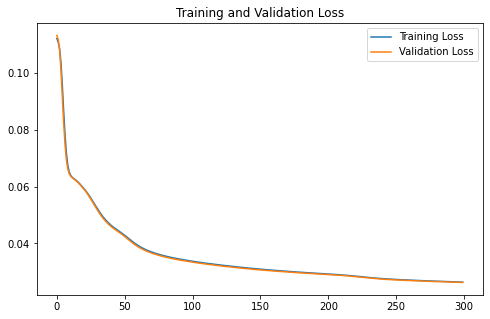

In [8]:
loss, val_loss = history.history['loss'], history.history['val_loss']

plt.figure(figsize=(8, 5))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

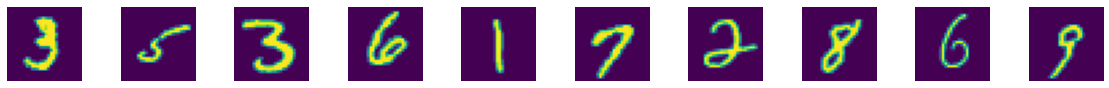

[10.38 13.92  2.19  0.   13.54 25.48 19.39  0.    0.    8.03]
[ 2.53  1.4   1.03  0.    5.04 12.11  2.77  0.    0.    1.6 ]
[17.56 14.8   2.93  0.   13.54 22.87 24.29  0.    0.    9.35]
[12.77  7.86  4.7   0.    2.62 28.62 12.89  0.    0.   10.01]
[1.22 7.02 1.57 0.   6.59 9.83 7.31 0.   0.   9.17]
[17.53  8.61  2.57  0.   19.92 30.93  7.07  0.    0.   17.81]
[11.16  3.47  1.6   0.    8.01 22.31 14.12  0.    0.    7.98]
[11.    9.5   3.2   0.   17.04 29.56 13.9   0.    0.   10.2 ]
[ 5.96  7.57  3.04  0.    2.61 14.98  7.94  0.    0.    5.56]
[ 7.34  7.4   1.56  0.   14.12 20.24  6.49  0.    0.   10.16]


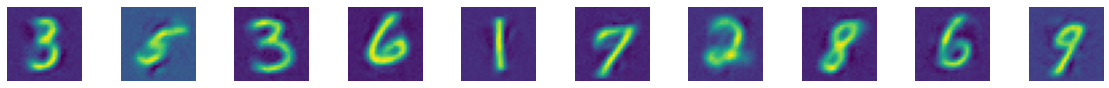

In [13]:
start = 10
code = encoder.predict( xTrain[start:start+10] )
recover = decoder.predict( code )
recover = recover.reshape(10,28,28)

plt.figure(figsize=(20, 3))
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(xTrain[start+i].reshape(28,28))
    plt.axis('off')
plt.show()

for row in code:
    print(np.round(row,2))

plt.figure(figsize=(20, 3))
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(recover[i])
    plt.axis('off')
plt.show()